# Instructions


The assignment is at the bottom!

## This cell automatically downloads Capital Bikeshare data

### And here we read in the data

In [469]:
!pip install seaborn

In [470]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 10
import pandas as pd
import numpy as np


day_hour_count = pd.read_csv("bikeshare_hour_count.csv")
day_hour_count

,hour_of_day,0,1,2,3,4,5,6
0,0.0,21.0,34.0,43.0,47.0,51.0,89.0,106.0
1,0.1,39.0,22.0,27.0,37.0,56.0,87.0,100.0
2,0.2,31.0,24.0,26.0,42.0,50.0,98.0,77.0
3,0.3,26.0,27.0,25.0,29.0,52.0,99.0,87.0
4,0.4,19.0,24.0,29.0,29.0,50.0,98.0,69.0
...,...,...,...,...,...,...,...,...
235,23.5,36.0,65.0,60.0,94.0,80.0,93.0,28.0
236,23.6,37.0,61.0,66.0,100.0,81.0,95.0,28.0
237,23.7,30.0,42.0,49.0,80.0,101.0,105.0,27.0
238,23.8,33.0,52.0,47.0,79.0,91.0,93.0,24.0


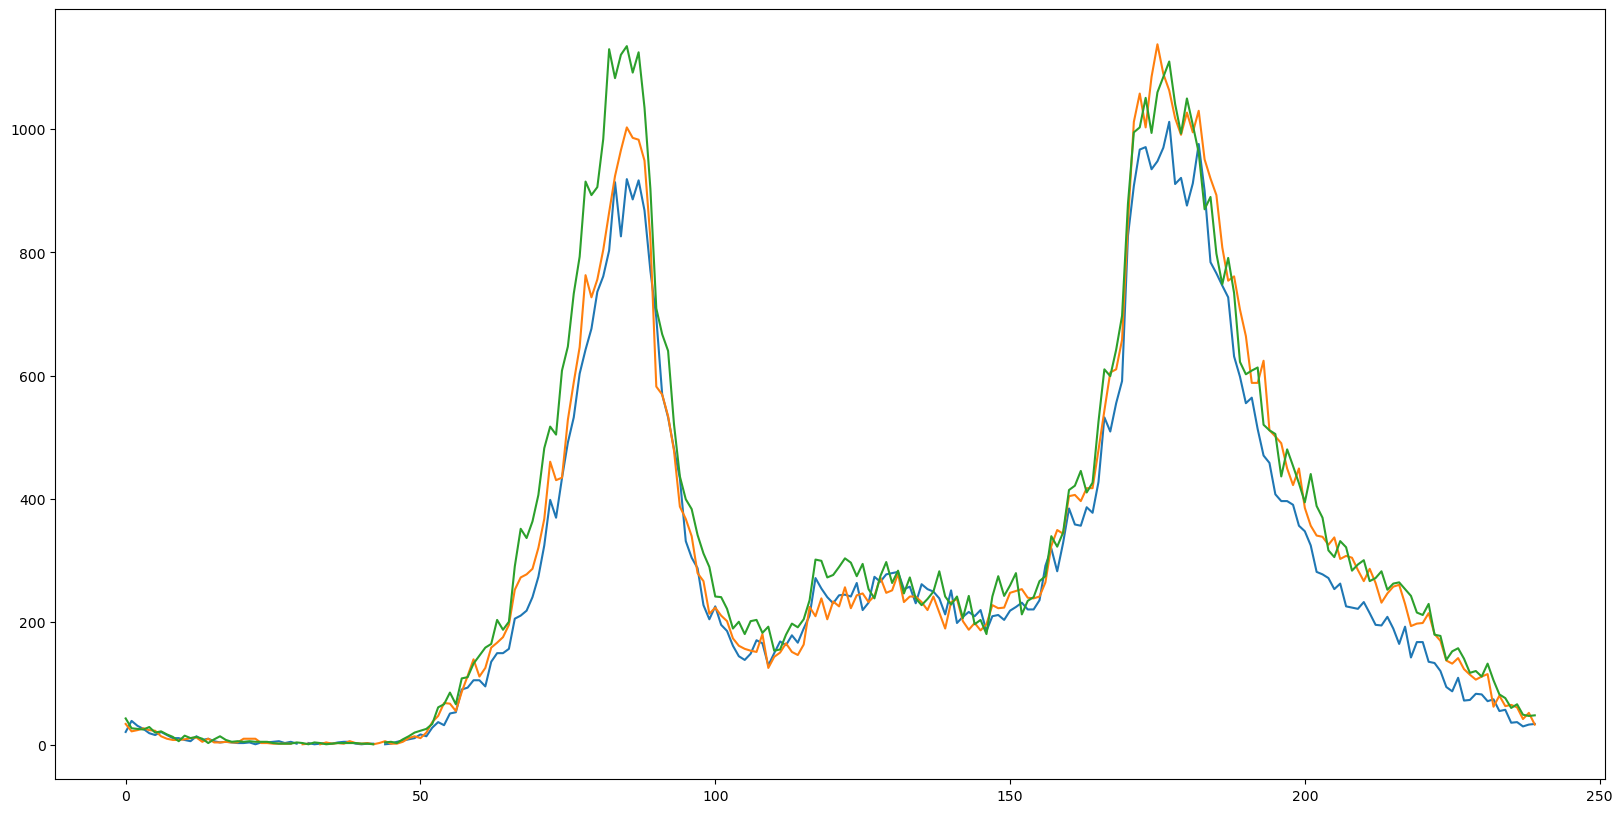

In [471]:
plt.figure(figsize=(20,10))
plt.plot(day_hour_count.index, day_hour_count["0"])
plt.plot(day_hour_count.index, day_hour_count["1"])
plt.plot(day_hour_count.index, day_hour_count["2"])

# Assignment 4


Explain the results in a **paragraph + charts** of  to describe which model you'd recommend. This means show the data and the model's line on the same chart. The paragraph is a simple justification and comparison of the several models you tried.

# 1. Using the **`day_hour_count`** dataframe create two dataframes `monday` and `saturday` that represent the data for those days. (hint: Monday is day=0)

In [472]:
day_hour_count["hour_of_day"]

0       0.0
1       0.1
2       0.2
3       0.3
4       0.4
       ... 
235    23.5
236    23.6
237    23.7
238    23.8
239    23.9
Name: hour_of_day, Length: 240, dtype: float64

In [473]:
day_hour_count_drop = day_hour_count.dropna()

day_hour_count_fill = day_hour_count.fillna(0)

day_hour_count_drop, day_hour_count_fill

(     hour_of_day     0     1     2      3      4      5      6
 0            0.0  21.0  34.0  43.0   47.0   51.0   89.0  106.0
 1            0.1  39.0  22.0  27.0   37.0   56.0   87.0  100.0
 2            0.2  31.0  24.0  26.0   42.0   50.0   98.0   77.0
 3            0.3  26.0  27.0  25.0   29.0   52.0   99.0   87.0
 4            0.4  19.0  24.0  29.0   29.0   50.0   98.0   69.0
 ..           ...   ...   ...   ...    ...    ...    ...    ...
 235         23.5  36.0  65.0  60.0   94.0   80.0   93.0   28.0
 236         23.6  37.0  61.0  66.0  100.0   81.0   95.0   28.0
 237         23.7  30.0  42.0  49.0   80.0  101.0  105.0   27.0
 238         23.8  33.0  52.0  47.0   79.0   91.0   93.0   24.0
 239         23.9  34.0  33.0  48.0   65.0  105.0  111.0   23.0
 
 [235 rows x 8 columns],
      hour_of_day     0     1     2      3      4      5      6
 0            0.0  21.0  34.0  43.0   47.0   51.0   89.0  106.0
 1            0.1  39.0  22.0  27.0   37.0   56.0   87.0  100.0
 2           

In [474]:
monday = day_hour_count_drop[["hour_of_day","0"]].copy()

In [475]:
saturday = day_hour_count_drop[["hour_of_day","5"]].copy()

In [476]:
monday["hour"] = monday.index

In [477]:
saturday["hour"] = saturday.index

In [478]:
monday

,hour_of_day,0,hour
0,0.0,21.0,0
1,0.1,39.0,1
2,0.2,31.0,2
3,0.3,26.0,3
4,0.4,19.0,4
...,...,...,...
235,23.5,36.0,235
236,23.6,37.0,236
237,23.7,30.0,237
238,23.8,33.0,238


In [479]:
saturday

,hour_of_day,5,hour
0,0.0,89.0,0
1,0.1,87.0,1
2,0.2,98.0,2
3,0.3,99.0,3
4,0.4,98.0,4
...,...,...,...
235,23.5,93.0,235
236,23.6,95.0,236
237,23.7,105.0,237
238,23.8,93.0,238



## 2a. Create 3 models fit to `monday.hour_of_day` with varying polynomial degrees ( choose from `n=5,10,15`). (Repeat for `saturday` below)

## Plot all the results for each polynomial.

In [480]:
x_mon = monday["hour_of_day"].values.reshape(-1,1)
y_mon = monday["0"]
x_mon, y_mon

(array([[ 0. ],
        [ 0.1],
        [ 0.2],
        [ 0.3],
        [ 0.4],
        [ 0.5],
        [ 0.6],
        [ 0.7],
        [ 0.8],
        [ 0.9],
        [ 1. ],
        [ 1.1],
        [ 1.2],
        [ 1.3],
        [ 1.4],
        [ 1.5],
        [ 1.6],
        [ 1.7],
        [ 1.8],
        [ 1.9],
        [ 2. ],
        [ 2.1],
        [ 2.2],
        [ 2.3],
        [ 2.4],
        [ 2.5],
        [ 2.6],
        [ 2.7],
        [ 2.8],
        [ 3.1],
        [ 3.3],
        [ 3.4],
        [ 3.5],
        [ 3.6],
        [ 3.7],
        [ 3.8],
        [ 3.9],
        [ 4. ],
        [ 4.1],
        [ 4.2],
        [ 4.4],
        [ 4.6],
        [ 4.7],
        [ 4.8],
        [ 4.9],
        [ 5. ],
        [ 5.1],
        [ 5.2],
        [ 5.3],
        [ 5.4],
        [ 5.5],
        [ 5.6],
        [ 5.7],
        [ 5.8],
        [ 5.9],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.3],
        [ 6.4],
        [ 6.5],
        [ 6.6],
        

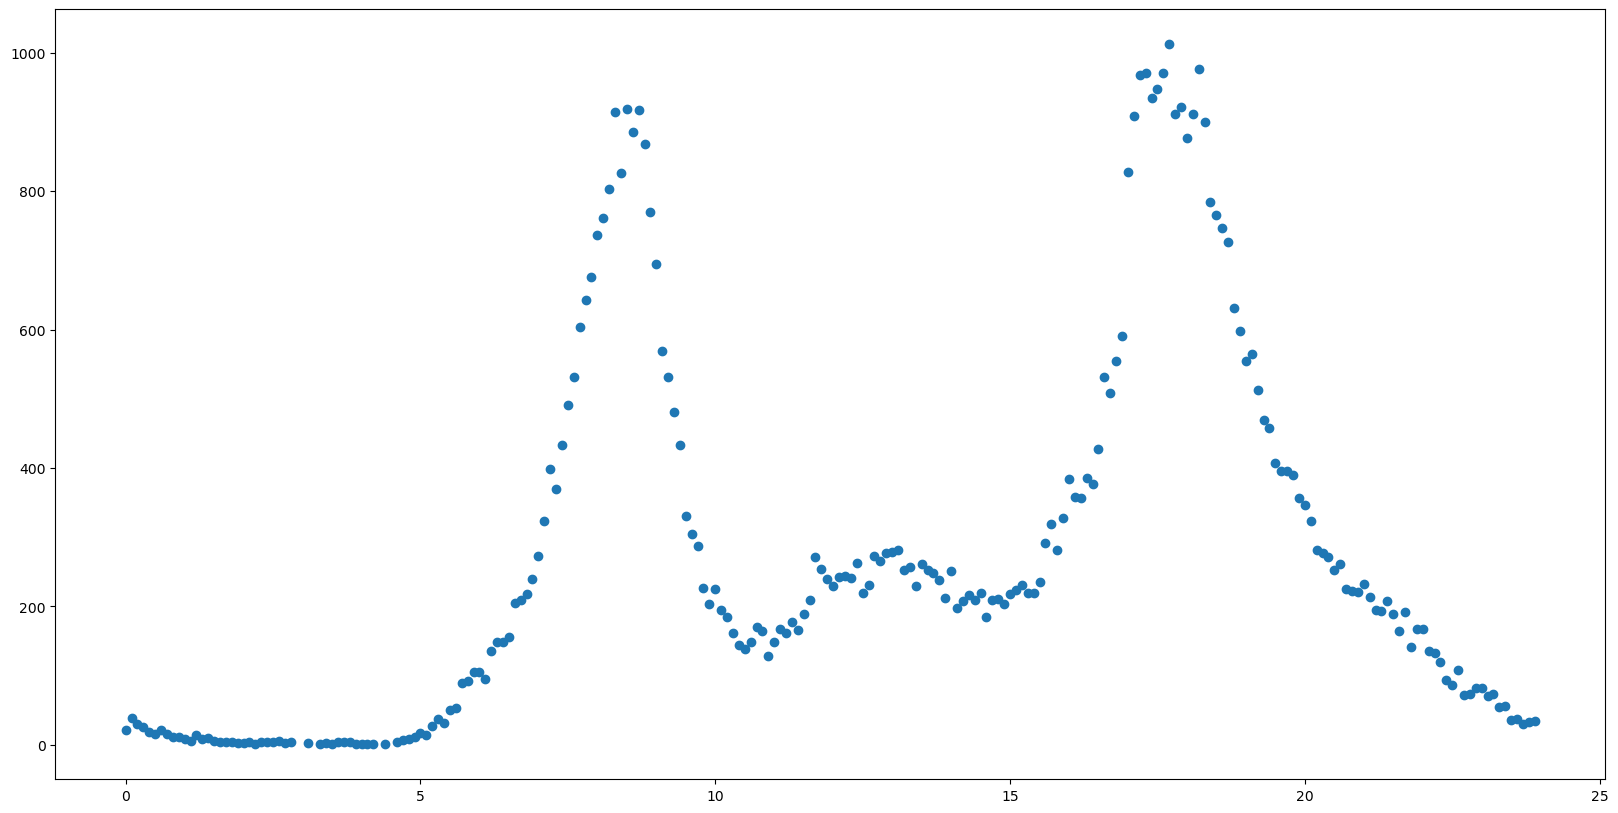

In [481]:
plt.scatter(x_mon, y_mon)

In [482]:
from sklearn import linear_model

In [483]:
linear_mon = linear_model.LinearRegression()

linear_mon.fit(x_mon, y_mon)

linear_mon.coef_, linear_mon.intercept_

(array([12.67240265]), 125.09525619708384)

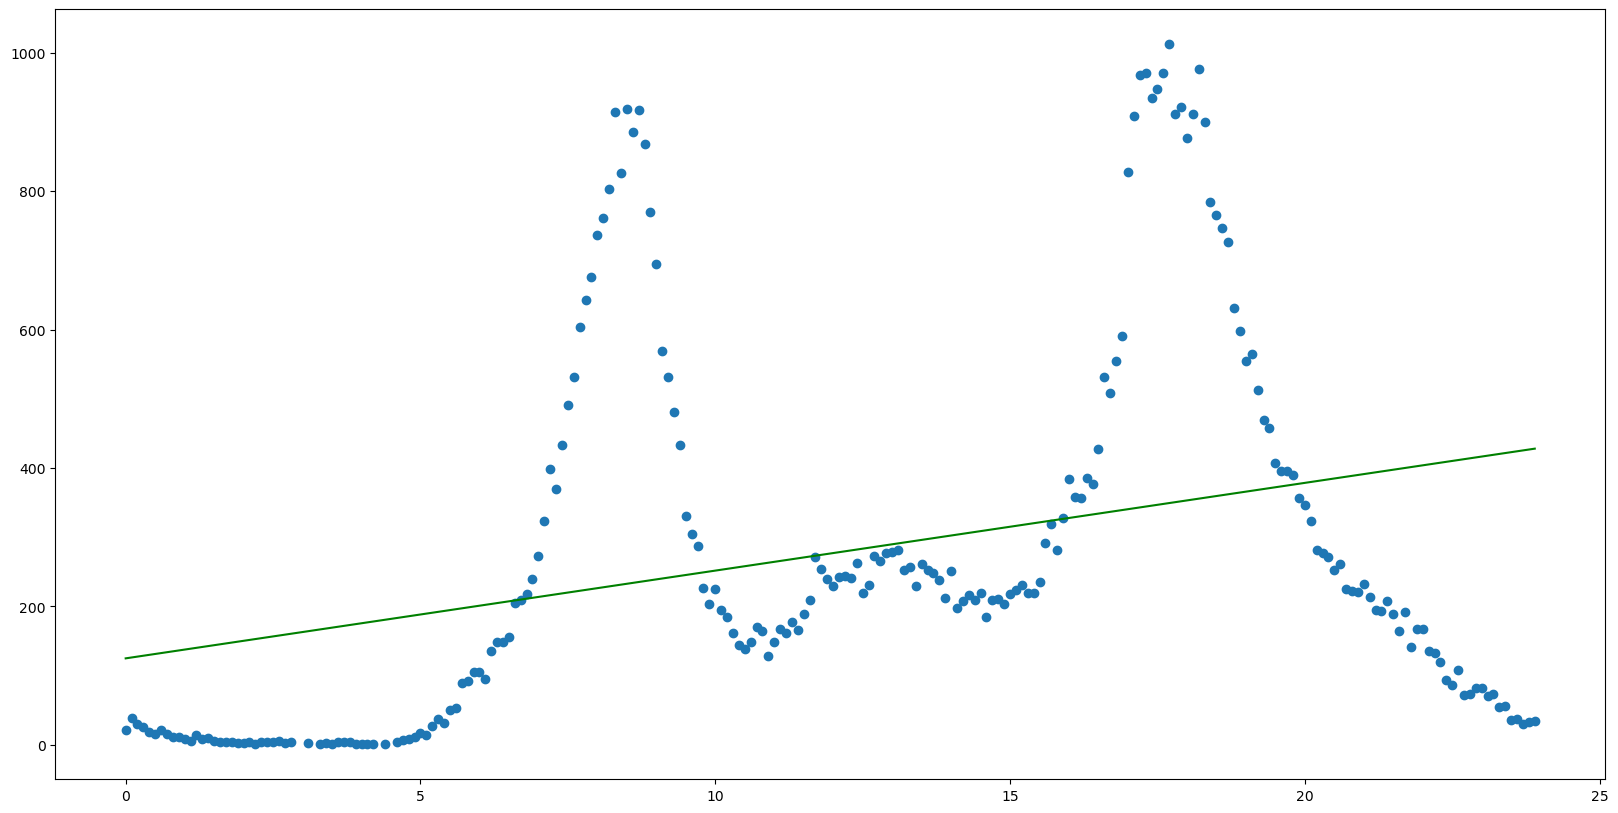

In [484]:
plt.scatter(x_mon,y_mon)
plt.plot(x_mon, x_mon*linear_mon.coef_ + linear_mon.intercept_, c='g')

In [485]:
from sklearn.preprocessing import PolynomialFeatures

poly15 = PolynomialFeatures(degree=15)

x_15 = poly15.fit_transform(x_mon)

In [486]:
#check what this looks like
x_15

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e-01, 1.00000000e-02, ...,
        1.00000000e-13, 1.00000000e-14, 1.00000000e-15],
       [1.00000000e+00, 2.00000000e-01, 4.00000000e-02, ...,
        8.19200000e-10, 1.63840000e-10, 3.27680000e-11],
       ...,
       [1.00000000e+00, 2.37000000e+01, 5.61690000e+02, ...,
        7.44266546e+17, 1.76391171e+19, 4.18047076e+20],
       [1.00000000e+00, 2.38000000e+01, 5.66440000e+02, ...,
        7.86140991e+17, 1.87101556e+19, 4.45301703e+20],
       [1.00000000e+00, 2.39000000e+01, 5.71210000e+02, ...,
        8.30180852e+17, 1.98413224e+19, 4.74207605e+20]])

In [487]:
poly10 = PolynomialFeatures(degree=10)

x_10 = poly10.fit_transform(x_mon)
x_10

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e-01, 1.00000000e-02, ...,
        1.00000000e-08, 1.00000000e-09, 1.00000000e-10],
       [1.00000000e+00, 2.00000000e-01, 4.00000000e-02, ...,
        2.56000000e-06, 5.12000000e-07, 1.02400000e-07],
       ...,
       [1.00000000e+00, 2.37000000e+01, 5.61690000e+02, ...,
        9.95375090e+10, 2.35903896e+12, 5.59092234e+13],
       [1.00000000e+00, 2.38000000e+01, 5.66440000e+02, ...,
        1.02947465e+11, 2.45014966e+12, 5.83135620e+13],
       [1.00000000e+00, 2.39000000e+01, 5.71210000e+02, ...,
        1.06459202e+11, 2.54437493e+12, 6.08105609e+13]])

In [488]:
poly5 = PolynomialFeatures(degree=5)

x_5 = poly5.fit_transform(x_mon)
x_5

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e-01, 1.00000000e-02, 1.00000000e-03,
        1.00000000e-04, 1.00000000e-05],
       [1.00000000e+00, 2.00000000e-01, 4.00000000e-02, 8.00000000e-03,
        1.60000000e-03, 3.20000000e-04],
       ...,
       [1.00000000e+00, 2.37000000e+01, 5.61690000e+02, 1.33120530e+04,
        3.15495656e+05, 7.47724705e+06],
       [1.00000000e+00, 2.38000000e+01, 5.66440000e+02, 1.34812720e+04,
        3.20854274e+05, 7.63633171e+06],
       [1.00000000e+00, 2.39000000e+01, 5.71210000e+02, 1.36519190e+04,
        3.26280864e+05, 7.79811265e+06]])

In [489]:
# troubleshooting errors that state mismatch
x_15.shape, x_10.shape, x_5.shape

((235, 16), (235, 11), (235, 6))

In [490]:
x_mon.shape

(235, 1)

In [491]:
linear_mon.fit(x_15, y_mon)

linear_mon.coef_, linear_mon.intercept_

(array([ 0.00000000e+00,  1.54736655e-05,  7.42928578e-08,  9.14147263e-07,
         5.78926997e-06,  3.21956700e-05,  1.49223079e-04,  5.14125523e-04,
         9.56456144e-04, -3.93293881e-04,  6.34693567e-05, -5.53175693e-06,
         2.84572749e-07, -8.67949237e-09,  1.45668064e-10, -1.03934004e-12]),
 22.14972588863776)

In [492]:
# troubleshooting mismatches, trying to find what works
#y_mon_lin15 = np.dot(x_15.reshape(-1,1), linear_mon.coef_) + linear_mon.intercept_
#y_mon_lin15 = np.dot(x_15.T, linear_mon.coef_) + linear_mon.intercept_
y_mon_lin15 = np.dot(x_15, linear_mon.coef_.T) + linear_mon.intercept_

y_mon_lin15.shape

(235,)

In [493]:
linear_mon.fit(x_10, y_mon)
linear_mon.coef_, linear_mon.intercept_
y_mon_lin10 = np.dot(x_10, linear_mon.coef_.T) + linear_mon.intercept_
y_mon_lin10

array([ 66.54747118,  39.22051635,  19.63117118,   6.41798012,
        -1.62402083,  -5.55554234,  -6.3046098 ,  -4.67748691,
        -1.36897964,   3.02785477,   8.01257039,  13.16874349,
        18.15590932,  22.70200301,  26.59628317,  29.68271771,
        31.85381176,  33.04485808,  33.22859111,  32.41022632,
        30.6228668 ,  27.92326002,  24.38788779,  20.10937319,
        15.19318872,   9.75465033,   3.91618256,  -2.19515949,
        -8.44992531, -26.7849425 , -37.41161877, -41.90076928,
       -45.70283459, -48.72472867, -50.88221931, -52.10039903,
       -52.31403704, -51.46782107, -49.51649777, -46.42491973,
       -36.73063081, -22.30254128, -13.32932846,  -3.20998527,
         8.02485033,  20.33654409,  33.67894354,  47.99888519,
        63.23672577,  79.32689309,  96.19845216, 113.77568244,
       131.97866248, 150.72385832, 169.92471221, 189.49222868,
       209.33555481, 229.36255219, 249.48035783, 269.59593198,
       289.61659038, 309.45051933, 329.00727155, 348.19

In [494]:
# 5 polynomials for monday
linear_mon.fit(x_5, y_mon)
linear_mon.coef_, linear_mon.intercept_
y_mon_lin5 = np.dot(x_5, linear_mon.coef_.T) + linear_mon.intercept_
y_mon_lin5

array([  28.01526488,   19.09310504,   11.07611465,    3.92961279,
         -2.38035452,   -7.88702121,  -12.62290785,  -16.61982856,
        -19.90889773,  -22.52053685,  -24.4844813 ,  -25.82978717,
        -26.58483802,  -26.77735172,  -26.43438721,  -25.58235135,
        -24.24700567,  -22.45347317,  -20.22624518,  -17.58918806,
        -14.56555011,  -11.17796828,   -7.448475  ,   -3.398505  ,
          0.95109792,    5.58007408,   10.46874112,   15.59798721,
         20.94926424,   38.15811291,   50.42553354,   56.75019772,
         63.18226921,   69.70746494,   76.31200435,   82.98260263,
         89.7064639 ,   96.47127441,  103.26519576,  110.07685808,
        123.71022805,  137.2895378 ,  144.03527986,  150.74000225,
        157.3954245 ,  163.99368027,  170.52731061,  176.98925706,
        183.37285497,  189.67182659,  195.88027437,  201.99267406,
        208.00386801,  213.90905829,  219.70379995,  225.38399419,
        230.94588157,  236.38603519,  241.70135394,  246.88905

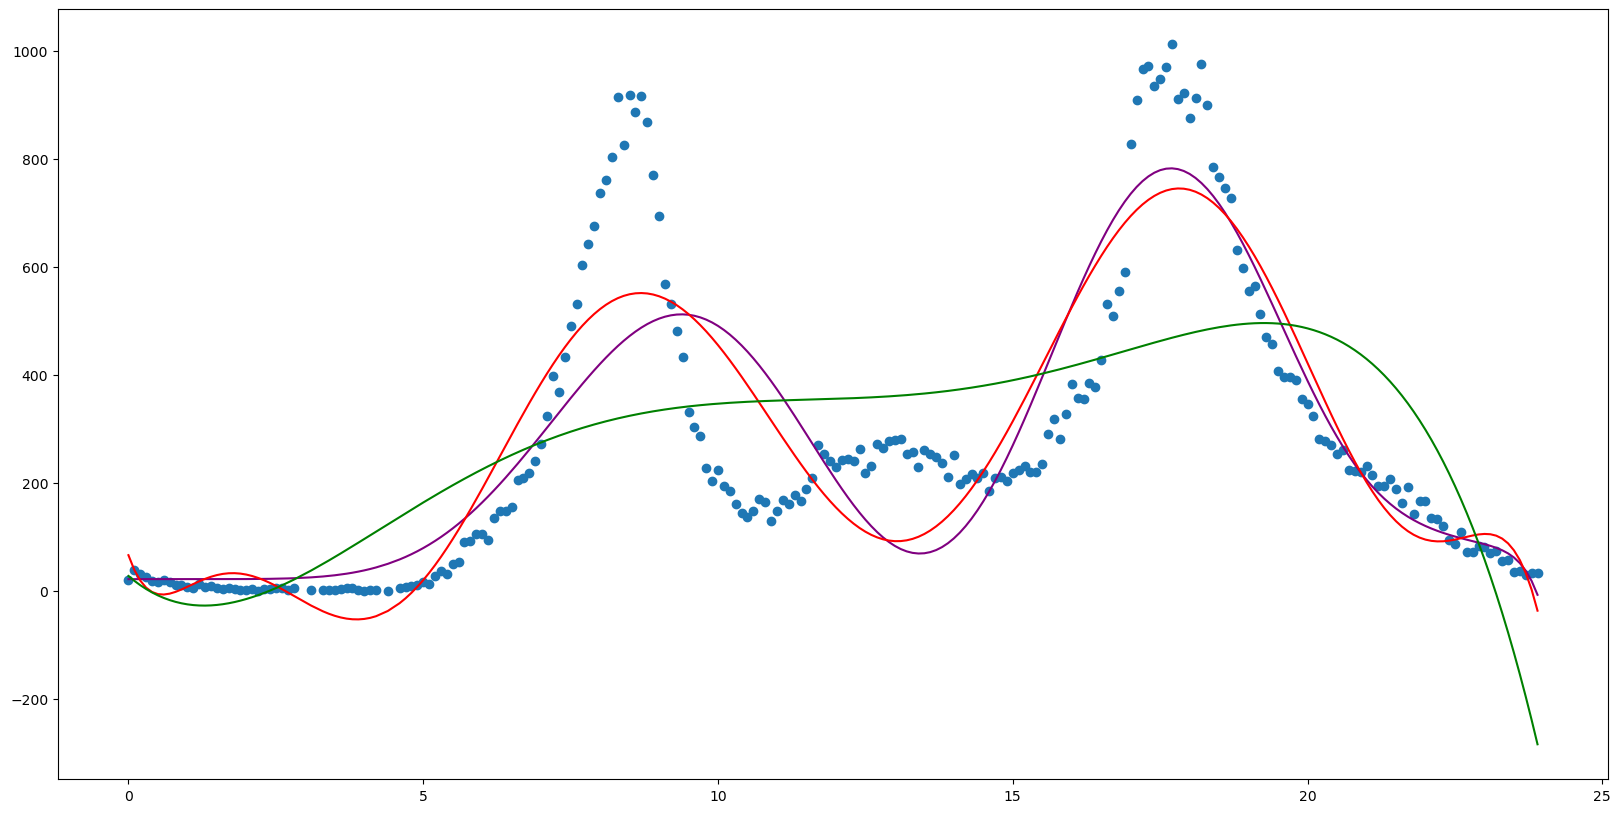

In [495]:
plt.scatter(x_mon,y_mon)
plt.plot(x_mon, y_mon_lin15, c='purple')
plt.plot(x_mon, y_mon_lin10, c='red')
plt.plot(x_mon, y_mon_lin5, c='green')

## 2b. Repeat `2a` for `saturday.hour_of_day`

In [496]:
x_sat = saturday["hour_of_day"].values.reshape(-1,1)
y_sat = saturday["5"]
x_sat, y_sat

(array([[ 0. ],
        [ 0.1],
        [ 0.2],
        [ 0.3],
        [ 0.4],
        [ 0.5],
        [ 0.6],
        [ 0.7],
        [ 0.8],
        [ 0.9],
        [ 1. ],
        [ 1.1],
        [ 1.2],
        [ 1.3],
        [ 1.4],
        [ 1.5],
        [ 1.6],
        [ 1.7],
        [ 1.8],
        [ 1.9],
        [ 2. ],
        [ 2.1],
        [ 2.2],
        [ 2.3],
        [ 2.4],
        [ 2.5],
        [ 2.6],
        [ 2.7],
        [ 2.8],
        [ 3.1],
        [ 3.3],
        [ 3.4],
        [ 3.5],
        [ 3.6],
        [ 3.7],
        [ 3.8],
        [ 3.9],
        [ 4. ],
        [ 4.1],
        [ 4.2],
        [ 4.4],
        [ 4.6],
        [ 4.7],
        [ 4.8],
        [ 4.9],
        [ 5. ],
        [ 5.1],
        [ 5.2],
        [ 5.3],
        [ 5.4],
        [ 5.5],
        [ 5.6],
        [ 5.7],
        [ 5.8],
        [ 5.9],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.3],
        [ 6.4],
        [ 6.5],
        [ 6.6],
        

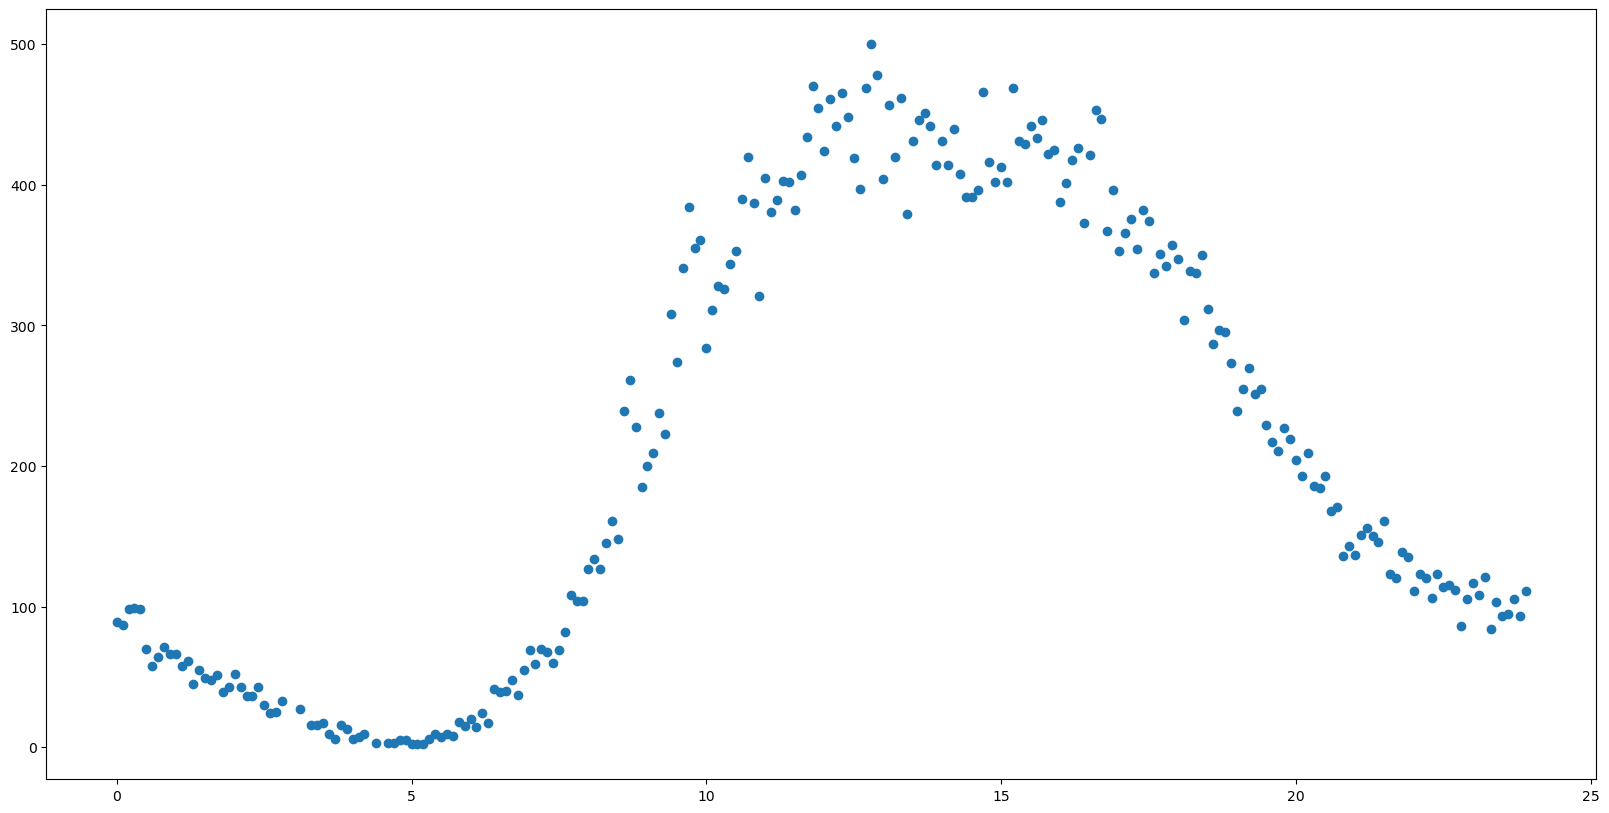

In [497]:
plt.scatter(x_sat, y_sat)

In [498]:
linear_sat = linear_model.LinearRegression()

linear_sat.fit(x_sat, y_sat)

linear_sat.coef_, linear_sat.intercept_

(array([9.71309939]), 99.50083162432375)

In [499]:
poly15 = PolynomialFeatures(degree=15)

x_15 = poly15.fit_transform(x_sat)
x_15

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e-01, 1.00000000e-02, ...,
        1.00000000e-13, 1.00000000e-14, 1.00000000e-15],
       [1.00000000e+00, 2.00000000e-01, 4.00000000e-02, ...,
        8.19200000e-10, 1.63840000e-10, 3.27680000e-11],
       ...,
       [1.00000000e+00, 2.37000000e+01, 5.61690000e+02, ...,
        7.44266546e+17, 1.76391171e+19, 4.18047076e+20],
       [1.00000000e+00, 2.38000000e+01, 5.66440000e+02, ...,
        7.86140991e+17, 1.87101556e+19, 4.45301703e+20],
       [1.00000000e+00, 2.39000000e+01, 5.71210000e+02, ...,
        8.30180852e+17, 1.98413224e+19, 4.74207605e+20]])

In [500]:
poly10 = PolynomialFeatures(degree=10)

x_10 = poly10.fit_transform(x_sat)
x_10

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e-01, 1.00000000e-02, ...,
        1.00000000e-08, 1.00000000e-09, 1.00000000e-10],
       [1.00000000e+00, 2.00000000e-01, 4.00000000e-02, ...,
        2.56000000e-06, 5.12000000e-07, 1.02400000e-07],
       ...,
       [1.00000000e+00, 2.37000000e+01, 5.61690000e+02, ...,
        9.95375090e+10, 2.35903896e+12, 5.59092234e+13],
       [1.00000000e+00, 2.38000000e+01, 5.66440000e+02, ...,
        1.02947465e+11, 2.45014966e+12, 5.83135620e+13],
       [1.00000000e+00, 2.39000000e+01, 5.71210000e+02, ...,
        1.06459202e+11, 2.54437493e+12, 6.08105609e+13]])

In [501]:
poly5 = PolynomialFeatures(degree=5)

x_5 = poly5.fit_transform(x_sat)
x_5

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e-01, 1.00000000e-02, 1.00000000e-03,
        1.00000000e-04, 1.00000000e-05],
       [1.00000000e+00, 2.00000000e-01, 4.00000000e-02, 8.00000000e-03,
        1.60000000e-03, 3.20000000e-04],
       ...,
       [1.00000000e+00, 2.37000000e+01, 5.61690000e+02, 1.33120530e+04,
        3.15495656e+05, 7.47724705e+06],
       [1.00000000e+00, 2.38000000e+01, 5.66440000e+02, 1.34812720e+04,
        3.20854274e+05, 7.63633171e+06],
       [1.00000000e+00, 2.39000000e+01, 5.71210000e+02, 1.36519190e+04,
        3.26280864e+05, 7.79811265e+06]])

In [502]:
# 15 polynomials for saturday
linear_sat.fit(x_15, y_sat)
linear_sat.coef_, linear_sat.intercept_
y_sat_lin15 = np.dot(x_15, linear_sat.coef_.T) + linear_sat.intercept_
y_sat_lin15

array([ 24.15367675,  24.15367683,  24.15367691,  24.15367702,
        24.15367721,  24.15367777,  24.15367941,  24.15368374,
        24.15369408,  24.15371652,  24.15376155,  24.15384618,
        24.1539967 ,  24.15425222,  24.15466885,  24.1553249 ,
        24.15632686,  24.15781633,  24.15997796,  24.1630483 ,
        24.16732559,  24.17318055,  24.18106793,  24.19153899,
        24.20525465,  24.22299928,  24.24569505,  24.27441665,
        24.31040631,  24.47723523,  24.65647148,  24.77341822,
        24.91225815,  25.07608985,  25.26829797,  25.49256112,
        25.75285801,  26.05347173,  26.39899188,  26.79431447,
        27.75546569,  28.9820637 ,  29.71024558,  30.52371982,
        31.42931019,  32.43405158,  33.54516546,  34.77003228,
        36.11616124,  37.59115728,  39.20268547,  40.95843295,
        42.86606857,  44.93320036,  47.1673311 ,  49.57581211,
        52.16579567,  54.94418612,  57.91759011,  61.09226613,
        64.4740738 ,  68.06842308,  71.8802238 ,  75.91

In [503]:
# 10 polynomials for saturday
linear_sat.fit(x_10, y_sat)
linear_sat.coef_, linear_sat.intercept_
y_sat_lin10 = np.dot(x_10, linear_sat.coef_.T) + linear_sat.intercept_
y_sat_lin10

array([ 1.09876032e+02,  9.97305024e+01,  9.10290251e+01,  8.36118919e+01,
        7.73299938e+01,  7.20445265e+01,  6.76266847e+01,  6.39573459e+01,
        6.09267467e+01,  5.84341515e+01,  5.63875154e+01,  5.47031433e+01,
        5.33053449e+01,  5.21260880e+01,  5.11046506e+01,  5.01872726e+01,
        4.93268082e+01,  4.84823808e+01,  4.76190392e+01,  4.67074177e+01,
        4.57234003e+01,  4.46477891e+01,  4.34659784e+01,  4.21676346e+01,
        4.07463820e+01,  3.91994965e+01,  3.75276054e+01,  3.57343963e+01,
        3.38263331e+01,  2.75135882e+01,  2.29498713e+01,  2.06103652e+01,
        1.82570173e+01,  1.59093647e+01,  1.35875787e+01,  1.13122755e+01,
        9.10433698e+00,  6.98474161e+00,  4.97440485e+00,  3.09403003e+00,
       -1.95907836e-01, -2.72874166e+00, -3.66539481e+00, -4.35944832e+00,
       -4.79504681e+00, -4.95739503e+00, -4.83282273e+00, -4.40884112e+00,
       -3.67419102e+00, -2.61888303e+00, -1.23422984e+00,  4.87128906e-01,
        2.55120906e+00,  

In [504]:
# 5 polynomials for saturday
linear_sat.fit(x_5, y_sat)
linear_sat.coef_, linear_sat.intercept_
y_sat_lin5 = np.dot(x_5, linear_sat.coef_.T) + linear_sat.intercept_
y_sat_lin5

array([ 1.34641512e+02,  1.26682084e+02,  1.18921759e+02,  1.11364223e+02,
        1.04012959e+02,  9.68712391e+01,  8.99421332e+01,  8.32285092e+01,
        7.67330360e+01,  7.04581861e+01,  6.44062381e+01,  5.85792788e+01,
        5.29792062e+01,  4.76077321e+01,  4.24663841e+01,  3.75565083e+01,
        3.28792723e+01,  2.84356670e+01,  2.42265096e+01,  2.02524458e+01,
        1.65139526e+01,  1.30113407e+01,  9.74475703e+00,  6.71418706e+00,
        3.91945767e+00,  1.36023944e+00, -9.63950786e-01, -3.05374736e+00,
       -4.90993335e+00, -9.08683603e+00, -1.07242034e+01, -1.12031803e+01,
       -1.14579801e+01, -1.14904850e+01, -1.13027032e+01, -1.08967663e+01,
       -1.02749269e+01, -9.43955630e+00, -8.39314160e+00, -7.13828349e+00,
       -4.01419185e+00, -9.02604498e-02,  2.16400960e+00,  4.60887713e+00,
        7.24101763e+00,  1.00570132e+01,  1.30533553e+01,  1.62264467e+01,
        1.95726048e+01,  2.30880635e+01,  2.67689758e+01,  3.06114167e+01,
        3.46113855e+01,  

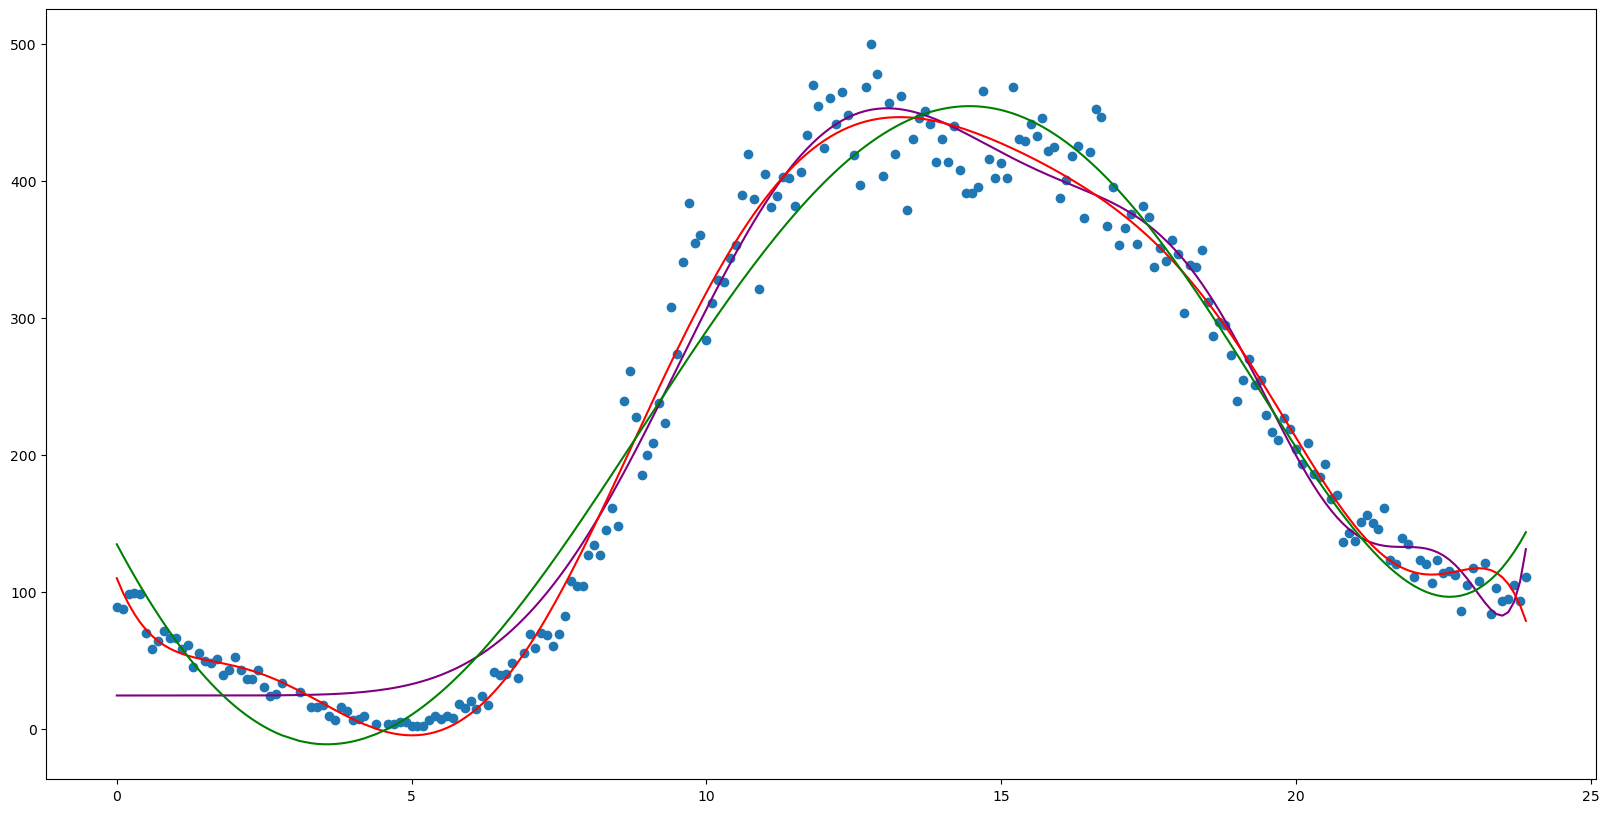

In [505]:
plt.scatter(x_sat,y_sat)
plt.plot(x_sat, y_sat_lin15, c='purple')
plt.plot(x_sat, y_sat_lin10, c='red')
plt.plot(x_sat, y_sat_lin5, c='green')

## 3. Using the n=15 polynomial, create 3 new models fit to `hour_of_day` with different Ridge Regression $\alpha$ (alpha) Ridge Coefficient values using the `monday` and `saturday` datasets.


In [506]:
#Monday alpha .5
poly15 = PolynomialFeatures(degree=15)

x_15 = poly15.fit_transform(x_mon)

ridge_mon = linear_model.Ridge(alpha=.5)
ridge_mon.fit(x_15, y_mon)

(ridge_mon.coef_, ridge_mon.intercept_)

(array([ 0.00000000e+00,  7.76323967e-03, -4.70822269e+00, -2.18797394e+02,
         3.92306495e+02, -2.61871056e+02,  9.30220460e+01, -2.02942596e+01,
         2.92637975e+00, -2.90050641e-01,  2.01090605e-02, -9.74933014e-04,
         3.24154585e-05, -7.04683223e-07,  9.02506540e-09, -5.16483965e-11]),
 94.21876785602973)

In [507]:
y_mon_ridge0_5 = np.dot(x_15, ridge_mon.coef_) + ridge_mon.intercept_
y_mon_ridge0_5

array([   94.21876786,    93.99036752,    92.83120509,    90.49472423,
          87.17662305,    83.33740946,    79.5663313 ,    76.47996385,
          74.64955249,    74.55194743,    76.53963543,    80.82597665,
          87.48229661,    96.44396992,   107.52306719,   120.42552405,
         134.77113503,   150.11497925,   165.96915225,   181.82391273,
         197.16755662,   211.50450742,   224.37126317,   235.3499691 ,
         244.07949391,   250.26397758,   253.67889324,   254.17472491,
         251.6784099 ,   226.62731993,   196.88612332,   178.89474371,
         159.28661435,   138.45309475,   116.80982488,    94.78785363,
          72.82489805,    51.35689073,    30.8099535 ,    11.5929163 ,
         -21.34289255,   -44.7669303 ,   -52.24362432,   -56.62972156,
         -57.78492558,   -55.61836709,   -50.08883928,   -41.20425223,
         -29.02035465,   -13.63877916,     4.79552644,    26.09741436,
          50.04512687,    76.3842874 ,   104.83221715,   135.08250151,
      

In [508]:
#Monday alpha 10
poly15 = PolynomialFeatures(degree=15)

x_15 = poly15.fit_transform(x_mon)

ridge_mon = linear_model.Ridge(alpha=10)
ridge_mon.fit(x_15, y_mon)

(ridge_mon.coef_, ridge_mon.intercept_)

(array([ 0.00000000e+00,  1.97969992e-02, -8.46375100e+00,  6.20187279e+01,
         5.84533029e+01, -8.75331348e+01,  4.02991039e+01, -9.99139279e+00,
         1.55150024e+00, -1.61133709e-01,  1.15223214e-02, -5.70472295e-04,
         1.92400647e-05, -4.22247025e-07,  5.43997687e-09, -3.12310237e-11]),
 9.957689975170354)

In [509]:
y_mon_ridge10 = np.dot(x_15, ridge_mon.coef_) + ridge_mon.intercept_
y_mon_ridge10

array([   9.95768998,    9.94206021,   10.18721898,   11.16445499,
         13.33034342,   17.07928523,   22.7126375 ,   30.42124576,
         40.27861326,   52.2423241 ,   66.16168027,   81.7898204 ,
         98.79886239,  116.7968563 ,  135.34555025,  153.97816303,
        172.21652436,  189.58709016,  205.63546678,  219.93918753,
        232.11857785,  241.84562463,  248.85083072,  252.92809044,
        253.93766544,  251.80737538,  246.53214425,  238.17206293,
        226.84914138,  177.15388916,  133.77243705,  110.04700277,
         85.48264231,   60.48226247,   35.45191088,   10.79387826,
        -13.0998134 ,  -35.85345264,  -57.1131407 ,  -76.55169837,
       -108.81525219, -130.70651098, -137.32803972, -140.91824295,
       -141.4186059 , -138.81261542, -133.12479405, -124.41919859,
       -112.7974307 ,  -98.39621111,  -81.38457147,  -61.96072001,
        -40.3486382 ,  -16.79446578,    8.43726858,   35.06751523,
         62.80661574,   91.35820738,  120.42307055,  149.70287

In [510]:
#Monday alpha 15
poly15 = PolynomialFeatures(degree=15)

x_15 = poly15.fit_transform(x_mon)

ridge_mon = linear_model.Ridge(alpha=15)
ridge_mon.fit(x_15, y_mon)

(ridge_mon.coef_, ridge_mon.intercept_)

(array([ 0.00000000e+00,  1.80096514e-02, -7.44022843e+00,  6.07398987e+01,
         4.71785060e+01, -7.67787993e+01,  3.59489547e+01, -8.97755235e+00,
         1.39911158e+00, -1.45561424e-01,  1.04152442e-02, -5.15588933e-04,
         1.73769583e-05, -3.80928418e-07,  4.90035657e-09, -2.80825479e-11]),
 17.151186679271916)

In [511]:
y_mon_ridge15 = np.dot(x_15, ridge_mon.coef_) + ridge_mon.intercept_
y_mon_ridge15

array([  17.15118668,   17.14331039,   17.39620438,   18.34685208,
         20.41028029,   23.93869707,   29.19535763,   36.34029808,
         45.42545926,   56.39706676,   69.10344238,   83.30669924,
         98.69701982,  114.90843579,  131.53522311,  148.14819758,
        164.31034613,  179.59136057,  193.58075438,  205.89934059,
        216.20893266,  224.22020059,  229.69867331,  232.46892695,
        232.41703747,  229.49140699,  223.70209672,  215.11881619,
        203.86773004,  156.12200266,  115.36773668,   93.2981605 ,
         70.58563147,   47.6060801 ,   24.7369956 ,    2.35108575,
        -19.18969405,  -39.53966661,  -58.37445109,  -75.39542361,
       -102.95279691, -120.46922306, -125.07882003, -126.79629981,
       -125.5763945 , -121.41302724, -114.33833668, -104.42120968,
        -91.76536659,  -76.50704703,  -58.81234639,  -38.87425517,
        -16.90945402,    6.84508227,   32.13561912,   58.69528317,
         86.24771989,  114.51073979,  143.19990786,  172.03203

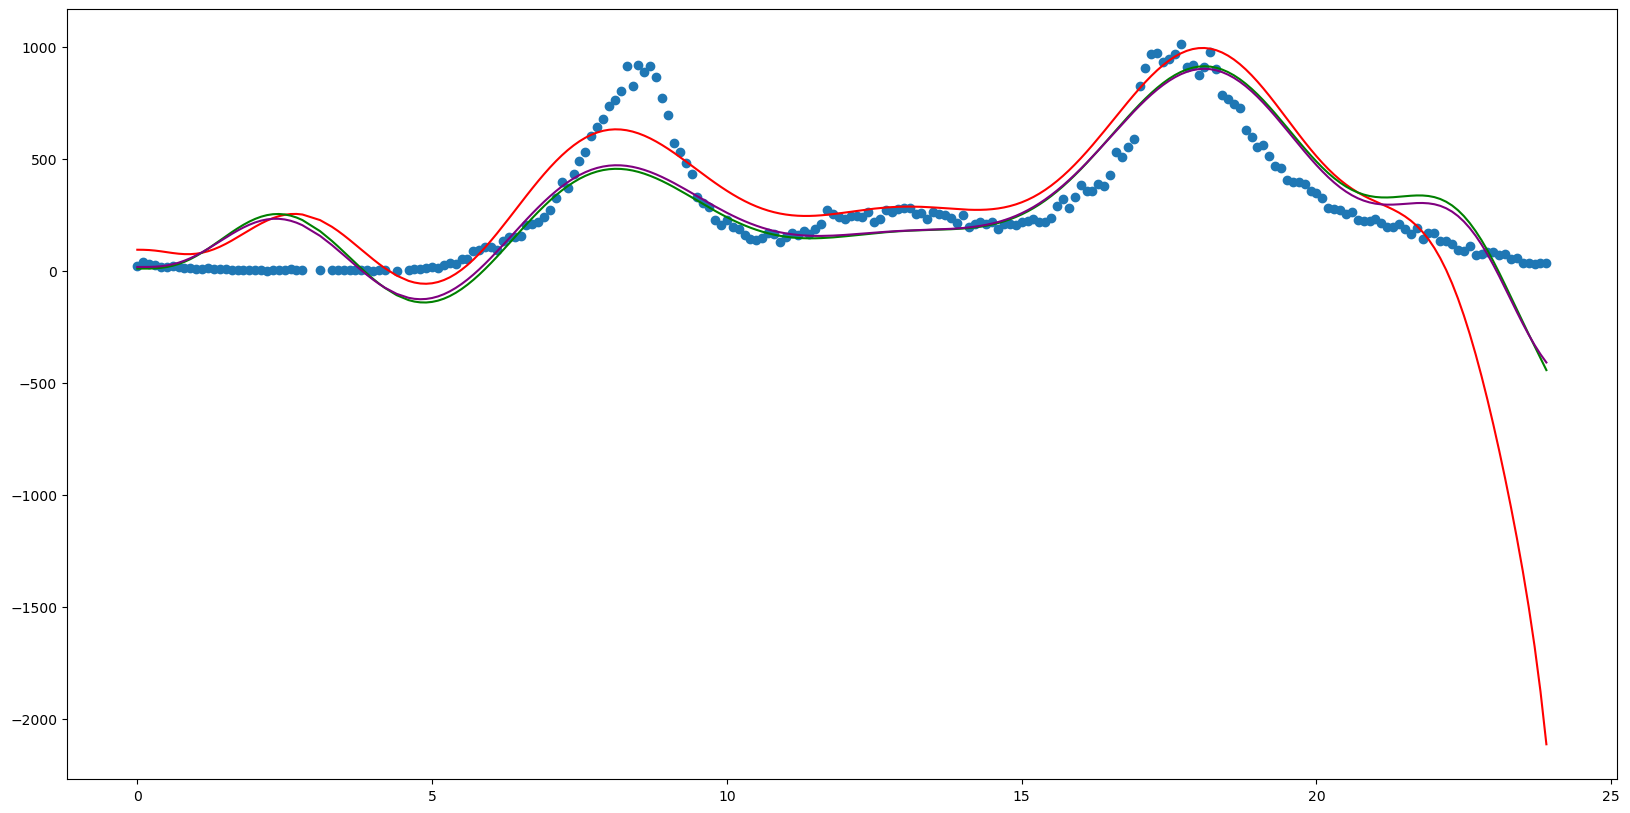

In [512]:
plt.scatter(x_mon,y_mon)
plt.plot(x_mon, y_mon_ridge0_5, c='r')
plt.plot(x_mon, y_mon_ridge10, c='g')
plt.plot(x_mon, y_mon_ridge15, c='purple')

In [513]:
#Saturday alpha .5
poly15 = PolynomialFeatures(degree=15)

x_15 = poly15.fit_transform(x_sat)

ridge_sat = linear_model.Ridge(alpha=.5)
ridge_sat.fit(x_15, y_sat)

(ridge_sat.coef_, ridge_sat.intercept_)

(array([ 0.00000000e+00,  3.07109227e-03, -1.11287502e+00,  3.08413554e+00,
        -8.77186822e+00,  5.99738153e+00, -2.10807188e+00,  4.54391117e-01,
        -6.43933086e-02,  6.21671496e-03, -4.15775258e-04,  1.92743742e-05,
        -6.08206562e-07,  1.24728884e-08, -1.49986535e-10,  8.03045836e-13]),
 78.07622891689869)

In [514]:
y_sat_ridge0_5 = np.dot(x_15, ridge_sat.coef_) + ridge_sat.intercept_
y_sat_ridge0_5

array([ 7.80762289e+01,  7.80676721e+01,  7.80447561e+01,  7.80023431e+01,
        7.79257046e+01,  7.77946106e+01,  7.75864766e+01,  7.72787186e+01,
        7.68504502e+01,  7.62836382e+01,  7.55638194e+01,  7.46804658e+01,
        7.36270765e+01,  7.24010588e+01,  7.10034574e+01,  6.94385755e+01,
        6.77135289e+01,  6.58377634e+01,  6.38225639e+01,  6.16805725e+01,
        5.94253348e+01,  5.70708842e+01,  5.46313727e+01,  5.21207554e+01,
        4.95525286e+01,  4.69395252e+01,  4.42937643e+01,  4.16263535e+01,
        3.89474412e+01,  3.09289783e+01,  2.56710608e+01,  2.30866187e+01,
        2.05388719e+01,  1.80328184e+01,  1.55734377e+01,  1.31658501e+01,
        1.08154703e+01,  8.52814966e+00,  6.31030562e+00,  4.16903536e+00,
        1.48553223e-01, -3.45982384e+00, -5.08247761e+00, -6.56783642e+00,
       -7.90256734e+00, -9.07249780e+00, -1.00626924e+01, -1.08575490e+01,
       -1.14409113e+01, -1.17961986e+01, -1.19065476e+01, -1.17549670e+01,
       -1.13245011e+01, -

In [515]:
#Saturday alpha 10
poly15 = PolynomialFeatures(degree=15)

x_15 = poly15.fit_transform(x_sat)

ridge_sat = linear_model.Ridge(alpha=10)
ridge_sat.fit(x_15, y_sat)

(ridge_sat.coef_, ridge_sat.intercept_)

(array([ 0.00000000e+00,  2.86969597e-03, -1.06428632e+00, -2.37236791e+00,
        -1.93046969e+00,  2.29012935e+00, -9.56533563e-01,  2.24824975e-01,
        -3.32845456e-02,  3.26418021e-03, -2.17179595e-04,  9.84408663e-06,
        -2.98928214e-07,  5.80480876e-09, -6.49267933e-11,  3.16543047e-13]),
 79.43505936886402)

In [516]:
y_sat_ridge10 = np.dot(x_15, ridge_sat.coef_) + ridge_sat.intercept_
y_sat_ridge10

array([ 7.94350594e+01,  7.94221600e+01,  7.93716686e+01,  7.92653585e+01,
        7.90845502e+01,  7.88114756e+01,  7.84302364e+01,  7.79274290e+01,
        7.72924998e+01,  7.65178872e+01,  7.55989979e+01,  7.45340584e+01,
        7.33238771e+01,  7.19715462e+01,  7.04821079e+01,  6.88622050e+01,
        6.71197323e+01,  6.52635012e+01,  6.33029279e+01,  6.12477521e+01,
        5.91077907e+01,  5.68927311e+01,  5.46119633e+01,  5.22744530e+01,
        4.98886531e+01,  4.74624528e+01,  4.50031605e+01,  4.25175181e+01,
        4.00117430e+01,  3.24294302e+01,  2.73714921e+01,  2.48564671e+01,
        2.23575898e+01,  1.98803740e+01,  1.74307719e+01,  1.50152792e+01,
        1.26410300e+01,  1.03158779e+01,  8.04846258e+00,  5.84826083e+00,
        1.69177458e+00, -2.06018721e+00, -3.75150537e+00, -5.30052373e+00,
       -6.69195246e+00, -7.90988517e+00, -8.93789943e+00, -9.75917029e+00,
       -1.03565954e+01, -1.07129298e+01, -1.08109292e+01, -1.06334997e+01,
       -1.01638522e+01, -

In [518]:
#Saturday alpha 15
poly15 = PolynomialFeatures(degree=15)

x_15 = poly15.fit_transform(x_sat)

ridge_sat = linear_model.Ridge(alpha=15)
ridge_sat.fit(x_15, y_sat)

(ridge_sat.coef_, ridge_sat.intercept_)

(array([ 0.00000000e+00,  2.91919865e-03, -1.09472723e+00, -2.26542802e+00,
        -1.66524296e+00,  2.00242221e+00, -8.35854051e-01,  1.96217285e-01,
        -2.89421619e-02,  2.81760744e-03, -1.85289966e-04,  8.25797406e-06,
        -2.44950034e-07,  4.60535744e-09, -4.92370543e-11,  2.24879797e-13]),
 79.14680308128925)

In [519]:
y_sat_ridge15 = np.dot(x_15, ridge_sat.coef_) + ridge_sat.intercept_
y_sat_ridge15

array([ 79.14680308,  79.13373498,  79.08339974,  78.97879598,
        78.80258117,  78.53826538,  78.17104962,  77.68837275,
        77.08022297,  76.33926254,  75.46080769,  74.44269977,
        73.28509811,  71.99022053,  70.56205274,  69.00604446,
        67.32880623,  65.5378183 ,  63.64116007,  61.64726651,
        59.56471574,  57.40205052,  55.16763485,  52.86954566,
        50.51549858,  48.11280619,  45.66836605,  43.18867589,
        40.67987254,  33.03609742,  27.89743248,  25.33189047,
        22.77672461,  20.23827608,  17.72336748,  15.23939163,
        12.79438998,  10.39711877,   8.05710148,   5.78466652,
         1.48799776,  -2.39373085,  -4.14452447,  -5.74876704,
        -7.19078744,  -8.45438236,  -9.52291684, -10.37943652,
       -11.00679015, -11.38776098, -11.50520543, -11.34219742,
       -10.88217677, -10.10909984,  -9.00759091,  -7.56309247,
        -5.76201293,  -3.59187   ,  -1.04142837,   1.89916988,
         5.23828337,   8.98265941,  13.13733297,  17.70

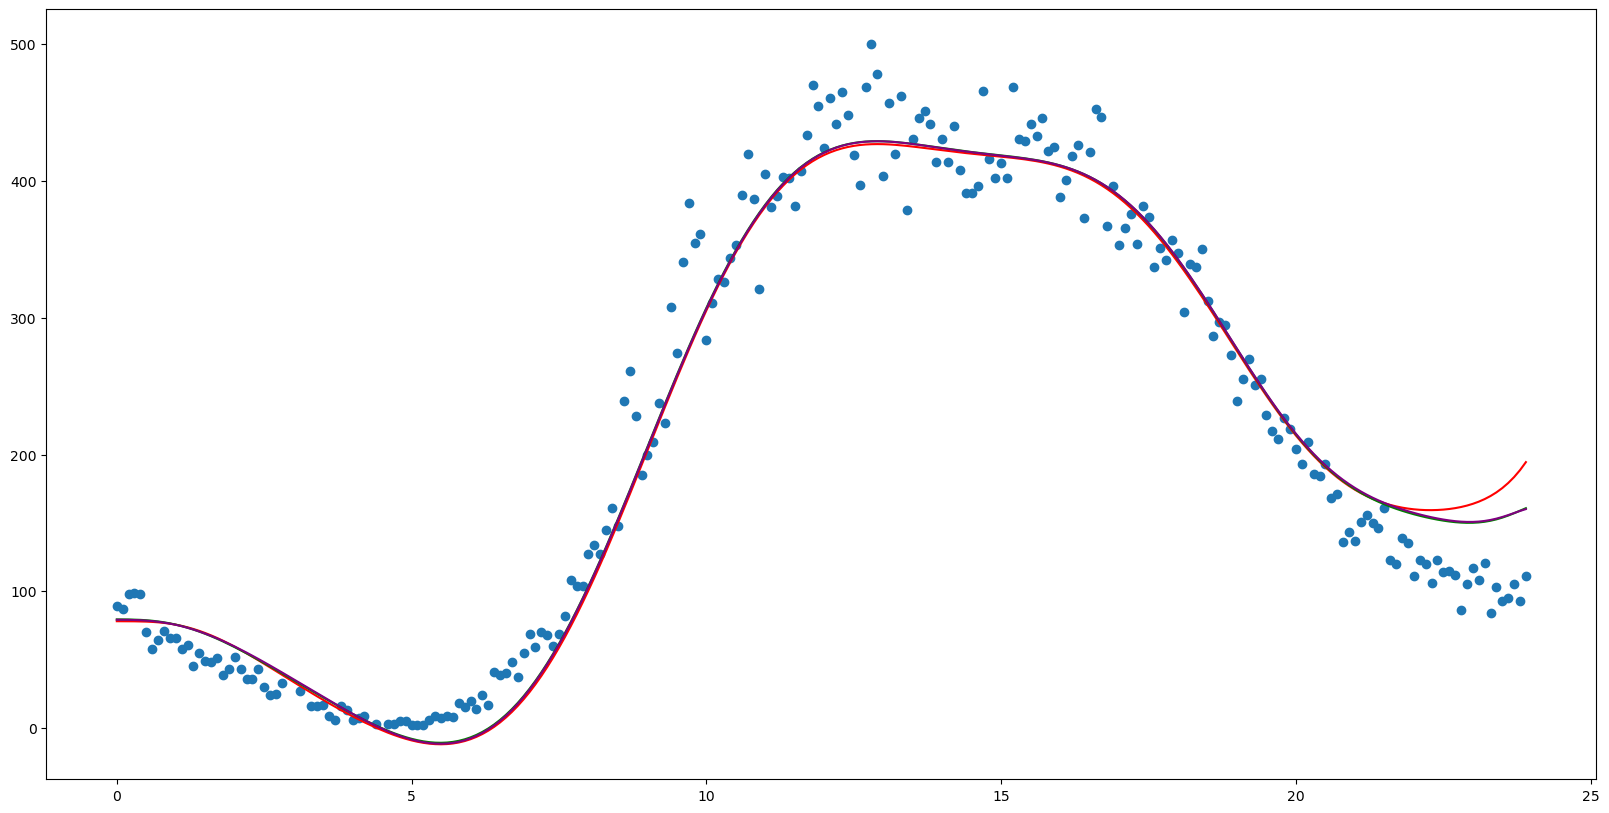

In [520]:
plt.scatter(x_sat,y_sat)
plt.plot(x_sat, y_sat_ridge0_5, c='r')
plt.plot(x_sat, y_sat_ridge10, c='g')
plt.plot(x_sat, y_sat_ridge15, c='purple')

## 4. Describe your results and which `n` and  $\alpha$ you find fits the data best to your models